#** TRANSFORMATION OF DATA **#

#The Data Transformation Process, allows for the data to be represented in a different way because we are shredding areas of the data that have missing information will be handled or transposed in a manner to accommodate the data without jeopardizing the integrity of the data and or the study
Removing ( or dropping) rows and / or columns with missing data ( where applicable).
In summary, the following will occur:
#Transposing data 
#Removing or Dropping specified Rows and / or Columns



In [33]:
import pandas as pd
import numpy as np

In [70]:
# Load `IMDB-Movie-Data.csv` as a pandas dataframe
df=pd.read_csv("C:/Users/deema/Desktop/EOP-01/LetsGoToTheMovies/Notebooks/data/raw/IMDB-Movie-Data.csv")  

#Make a back up copy of the Original Data Frame
df_copy = df.copy()

In [71]:
data=df 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [66]:
#Drop blanks and NA's from the dataframe
df = df.dropna()

In [36]:
# Print out the shape of this dataframe for better clarity

print(df.shape)

(1000, 12)


In [37]:
# Clean Data:Changing the "blanks" to NAN
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [38]:
print(df.describe)

<bound method NDFrame.describe of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of

In [39]:
#Print the header for the dataframe
print(df.head)


<bound method NDFrame.head of      Rank                    Title                     Genre  \
0       1  Guardians of the Galaxy   Action,Adventure,Sci-Fi   
1       2               Prometheus  Adventure,Mystery,Sci-Fi   
2       3                    Split           Horror,Thriller   
3       4                     Sing   Animation,Comedy,Family   
4       5            Suicide Squad  Action,Adventure,Fantasy   
..    ...                      ...                       ...   
995   996     Secret in Their Eyes       Crime,Drama,Mystery   
996   997          Hostel: Part II                    Horror   
997   998   Step Up 2: The Streets       Drama,Music,Romance   
998   999             Search Party          Adventure,Comedy   
999  1000               Nine Lives     Comedy,Family,Fantasy   

                                           Description              Director  \
0    A group of intergalactic criminals are forced ...            James Gunn   
1    Following clues to the origin of man

In [40]:
#Setting additional environment variables

import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Distribution graphs (histogram/bar graph) of column data
%matplotlib inline
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    #df= Correlation-Matrix-Check 
    #df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
def plotCorrelationMatrix(df, graphWidth):
    filename = df.Correlation_Data_Matrix
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    #plt.show()
    plt.show(block=True)

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
num_rows = int(1.0)
def plotPerColumnDistribution(df, n_graph_shown, n_graph_per_row):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    n_row, n_col = df.shape
    column_names = list(df)
    n_graph_row = (n_col + n_graph_per_row - 1) / n_graph_per_row
    plt.figure(num = None, figsize = (6 * n_graph_per_row, 8 * n_graph_row), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(n_col, n_graph_shown)):
        plt.subplot(n_graph_row, n_graph_per_row, i + 1)
        column_dummies = pd.get_dummies(df.iloc[:, i])
        if len(column_dummies.columns) > 1:
            column_dummies.sum(axis=0).plot(kind='bar', stacked=True)
        else:
            column_dummies.iloc[:, 0].value_counts().plot(kind='bar', stacked=True)
        plt.title(f"{column_names[i]} (column {i})")
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.suptitle('Distribution_By_Column')
    
    #plt.show()
plt.show(block=True)

In [ ]:
plotPerColumnDistribution(df, 10, 5)



In [56]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = remove_singular(df)
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames == columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
    


BIVARIATE Analysis: Now review how we can Plot some functions and create some more Data Visualizations.


Distribution graphs (histogram/bar graph) of sampled columns:

In [ ]:
plotPerColumnDistribution(df, 10, 5)

Correlation matrix:

In [ ]:
plotCorrelationMatrix(df, 8)



Scatter and density plots:

In [ ]:
plotScatterMatrix(df, 20, 10)


<Axes: xlabel='Rating', ylabel='Runtime (Minutes)'>

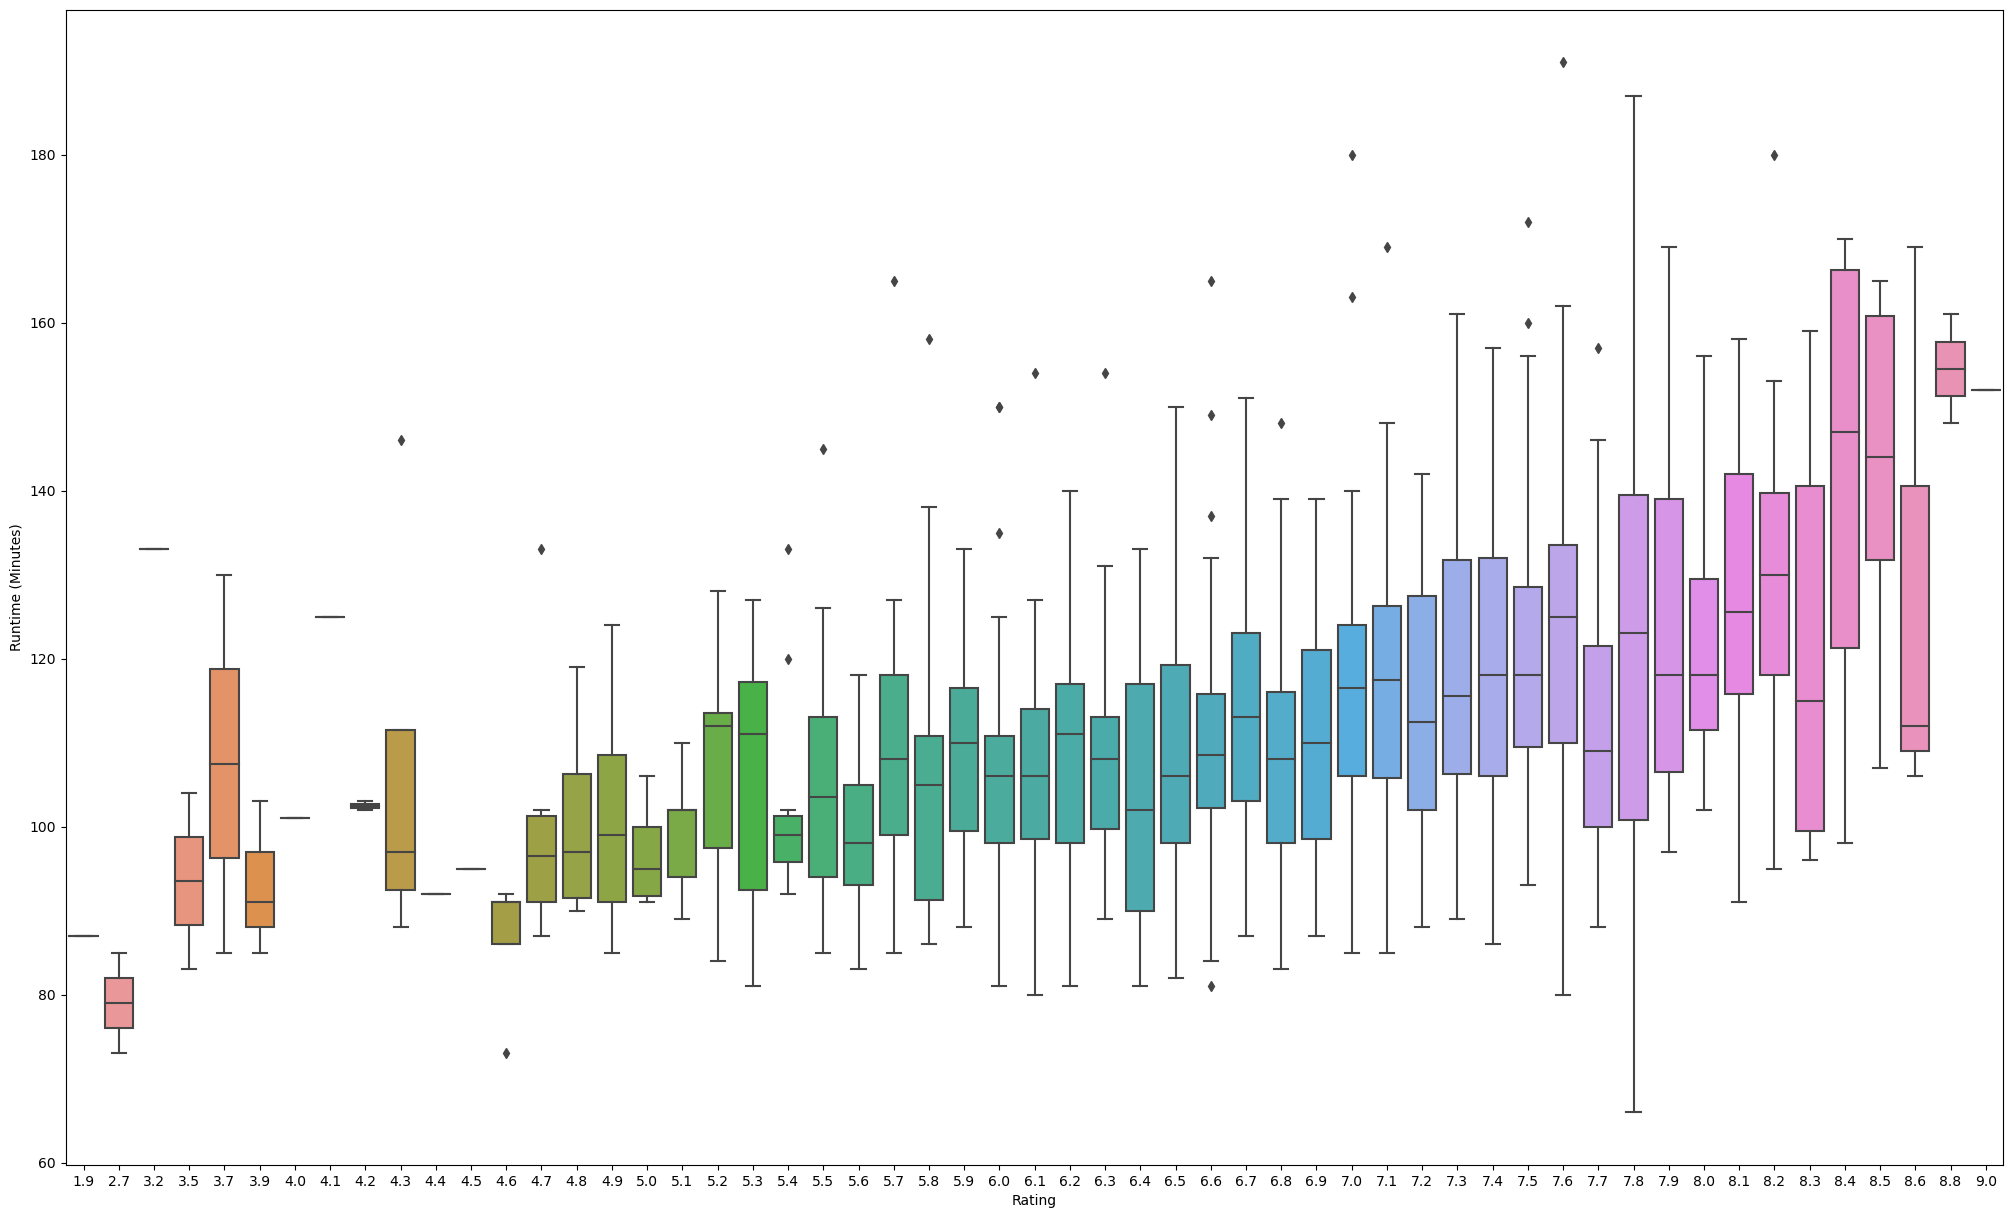

In [63]:
# boxplot to showcase possible relationship between 'Rating' and 'Runtime' columns 
plt.figure(figsize=(25, 15))
# 20 = width (in) and 14 = height (in)
sns.boxplot(data= df, x= 'Rating', y= 'Runtime (Minutes)')

<Axes: xlabel='Runtime (Minutes)', ylabel='Rating'>

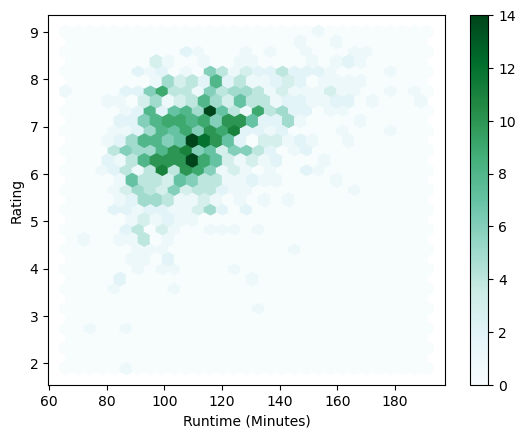

In [74]:
df.plot(kind='hexbin', x='Runtime (Minutes)', y='Rating', gridsize=30, sharex=False)

In [73]:

df.to_csv("C:/Users/deema/Desktop/EOP-01/LetsGoToTheMovies/Notebooks/data/processed/Clean-Movie-Data.csv")